## INTRODUCTION
La gestion intelligente de la consommation énergétique est un enjeu majeur dans un contexte de transition énergétique, de hausse des coûts et de recherche d'efficacité domestique. À travers ce projet, nous exploitons un jeu de données provenant de capteurs installés dans une habitation résidentielle en Belgique, combiné à des données météorologiques horaires issues d’une station locale.

Notre objectif est de concevoir un système capable non seulement de prédire la consommation énergétique à partir des conditions environnementales, mais également de comprendre les habitudes de consommation et de détecter des comportements anormaux ou inefficaces.

## OBJECTIFS

- Prétraiter et explorer les données
Mener une analyse exploratoire rigoureuse pour comprendre les tendances générales, les variables explicatives, et la structure temporelle de la consommation.

- Construire des modèles de prévision supervisée
Mettre en œuvre plusieurs algorithmes d’apprentissage supervisé (régression linéaire, forêts aléatoires, XGBoost) pour prédire la consommation d’énergie (Appliances) en fonction des facteurs internes (température, humidité, activité) et externes (météo, heure).

- Identifier des profils d’usage par apprentissage non supervisé
Utiliser des méthodes de clustering (comme KMeans) pour segmenter les comportements énergétiques typiques dans la maison selon les moments de la journée, la météo, et les usages.

- Détecter des anomalies de consommation
Implémenter une détection d’anomalies par Isolation Forest afin d’identifier des comportements énergétiques inhabituels ou potentiellement problématiques.

- Fournir une base d’analyse pour l’optimisation
Mettre en lumière des situations pouvant mener à une surconsommation inutile, et préparer le terrain pour des stratégies de réduction ou de pilotage intelligent de l’énergie.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime


On utilise pandas pour manipuler les données.
On prépare aussi la suite avec matplotlib et seaborn pour les visualisations à venir.

## EXPLORATION DES DONNEES

In [ ]:
# Configuration des affichages
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Chargement du dataset
df = pd.read_excel("C:\Users\emman\Downloads\ML\Dataset\energydata_complete.xlsx")

# --- 1. Aperçu des données ---
print("\n Aperçu du dataset :")
print(df.head())

# --- Informations générales sur le dataset ---
print("\n Informations sur les colonnes :")
df.info()

# --- Statistiques descriptives initiales ---
print("\n Statistiques descriptives :")
display(df.describe())



 Aperçu du dataset :
                 date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8       

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634


### Nettoyage de base + enrichissement temporel

In [3]:
# --- Suppression des colonnes aléatoires ---

df.drop(columns=["rv1", "rv2"], inplace=True)

# --- Création de nouvelles colonnes temporelles à partir de la colonne 'date' ---
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = lundi
df['month'] = df['date'].dt.month
df['weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # samedi/dimanche = 1

# --- Réorganisation des colonnes pour plus de lisibilité (optionnel) ---
# On place la date et les infos temporelles au début
temporal_cols = ['date', 'hour', 'day_of_week', 'weekend', 'month']
other_cols = [col for col in df.columns if col not in temporal_cols]
df = df[temporal_cols + other_cols]

# --- Aperçu du dataframe nettoyé ---
display(df.head())


,date,hour,day_of_week,weekend,month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,17,0,0,1,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,17,0,0,1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,17,0,0,1,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,17,0,0,1,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,17,0,0,1,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


Dans cette première phase de traitement, nous avons réalisé un nettoyage minimal mais stratégique du jeu de données. Deux colonnes (rv1 et rv2), identifiées comme variables aléatoires sans signification physique, ont été supprimées afin d’éliminer le bruit et ne pas biaiser les futurs modèles. Ensuite, nous avons enrichi le dataset en extrayant des caractéristiques temporelles clés à partir de la colonne date. Cela nous permet d'intégrer la dimension temporelle dans l’analyse, indispensable dans un contexte de consommation énergétique qui varie fortement selon l’heure de la journée, le jour de la semaine ou la saison.

Cette étape, bien que simple, pose les fondations d’un système prédictif pertinent : elle structure les données dans un format exploitable par les algorithmes d’apprentissage, tout en gardant la logique métier (ex. week-end = comportement domestique différent). Ce travail prépare aussi les visualisations à venir, notamment pour observer les patterns de consommation selon ces nouvelles dimensions temporelles.

### Vérification de la présence de valeurs manquantes

Aucune valeur manquante détectée dans le dataset.


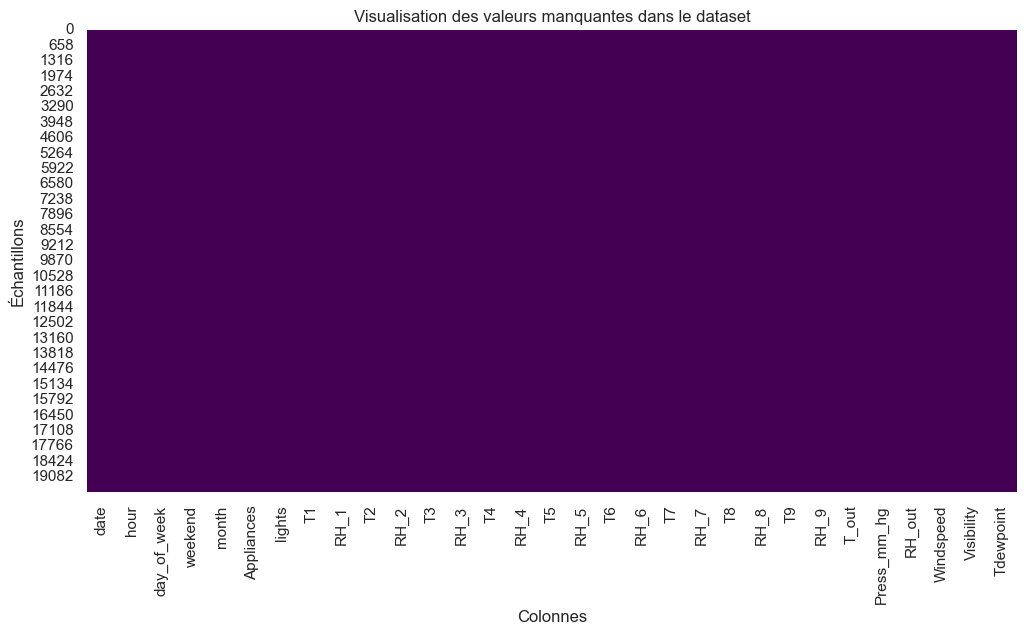

In [ ]:
# Vérification des valeurs manquantes
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Affichage sous forme de tableau
if missing_data.empty:
    print("Aucune valeur manquante détectée dans le dataset.")
else:
    print("Colonnes avec des valeurs manquantes :")
    display(missing_data)

# Visualisation graphique
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes dans le dataset")
plt.xlabel("Colonnes")
plt.ylabel("Échantillons")
plt.show()


La heatmap est uniformément remplie (aucune zone noire). Ce qui indique l'inexistence de valeurs manquantes.

### Analyse temporelle de la consommation

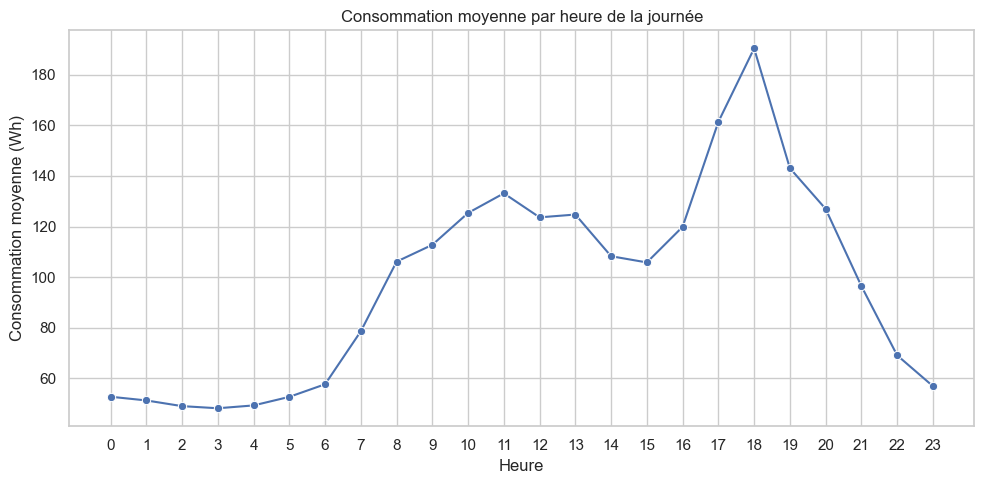

C:\Users\abdou\AppData\Local\Temp\ipykernel_15080\1956004840.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days, y=weekly_consumption.values, palette="Blues")


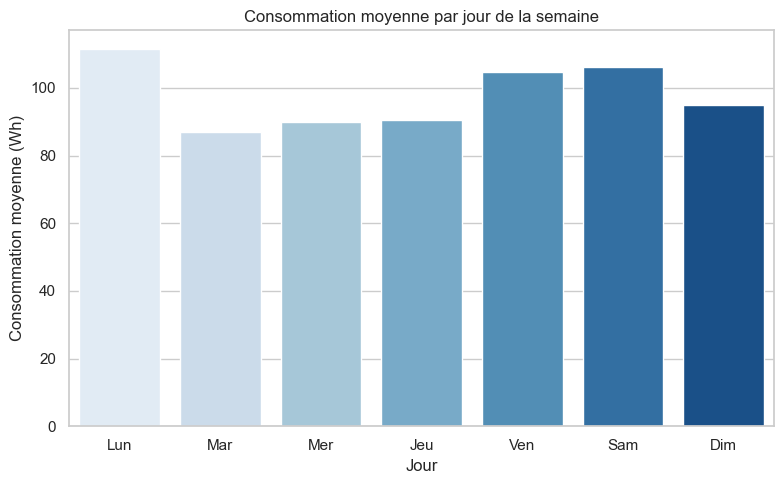

C:\Users\abdou\AppData\Local\Temp\ipykernel_15080\1956004840.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_consumption.index, y=monthly_consumption.values, palette="Greens")


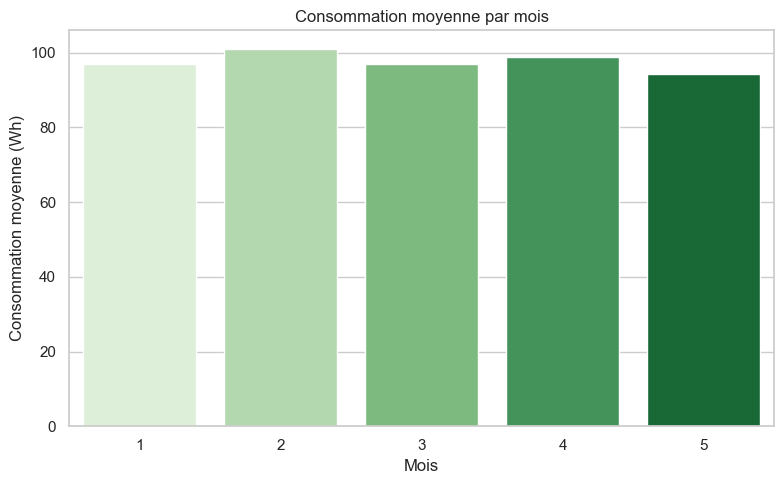

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Consommation moyenne par heure
hourly_consumption = df.groupby("hour")["Appliances"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_consumption.index, y=hourly_consumption.values, marker="o")
plt.title("Consommation moyenne par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Consommation moyenne (Wh)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Consommation moyenne par jour de la semaine
weekly_consumption = df.groupby("day_of_week")["Appliances"].mean()
days = ["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"]

plt.figure(figsize=(8, 5))
sns.barplot(x=days, y=weekly_consumption.values, palette="Blues")
plt.title("Consommation moyenne par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Consommation moyenne (Wh)")
plt.tight_layout()
plt.show()

# Consommation moyenne par mois
monthly_consumption = df.groupby("month")["Appliances"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_consumption.index, y=monthly_consumption.values, palette="Greens")
plt.title("Consommation moyenne par mois")
plt.xlabel("Mois")
plt.ylabel("Consommation moyenne (Wh)")
plt.tight_layout()
plt.show()


### Evolution de la consommation énergétique dans le temps

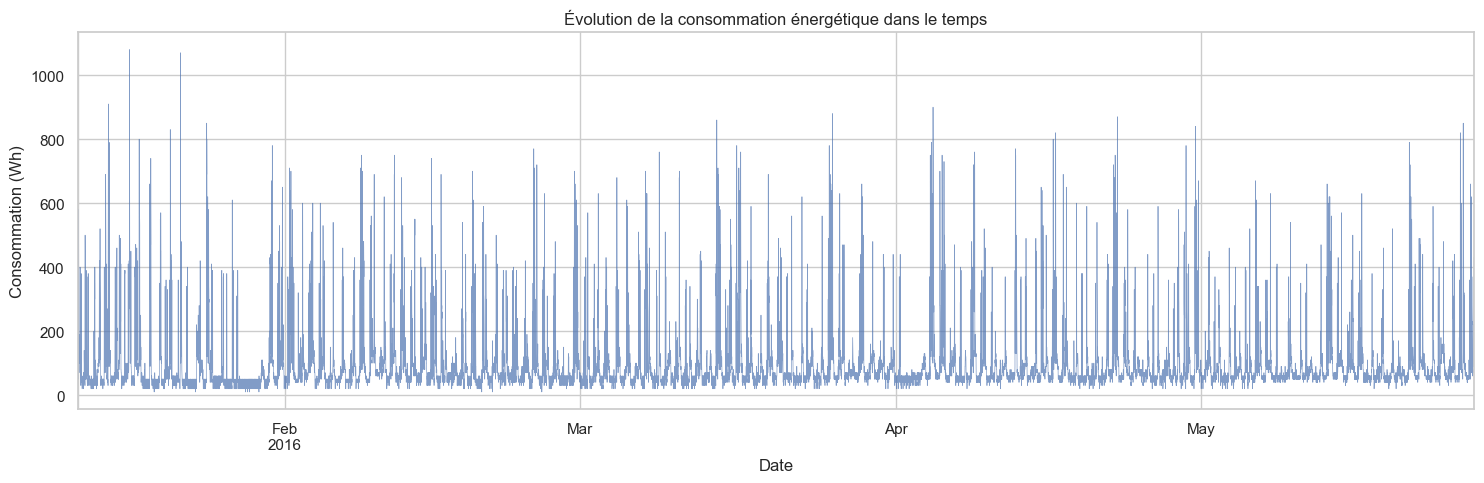

In [ ]:
# Tri des données par date (au cas où ce ne serait pas déjà fait)
df.sort_values("date", inplace=True)

# Définition de la date comme index pour faciliter les plots temporels
df.set_index("date", inplace=True)

# Série temporelle brute de la consommation
plt.figure(figsize=(15, 5))
df["Appliances"].plot(linewidth=0.5, alpha=0.7)
plt.title("Évolution de la consommation énergétique dans le temps")
plt.xlabel("Date")
plt.ylabel("Consommation (Wh)")
plt.tight_layout()
plt.show()


### Consommation énergétique moyenne par jour

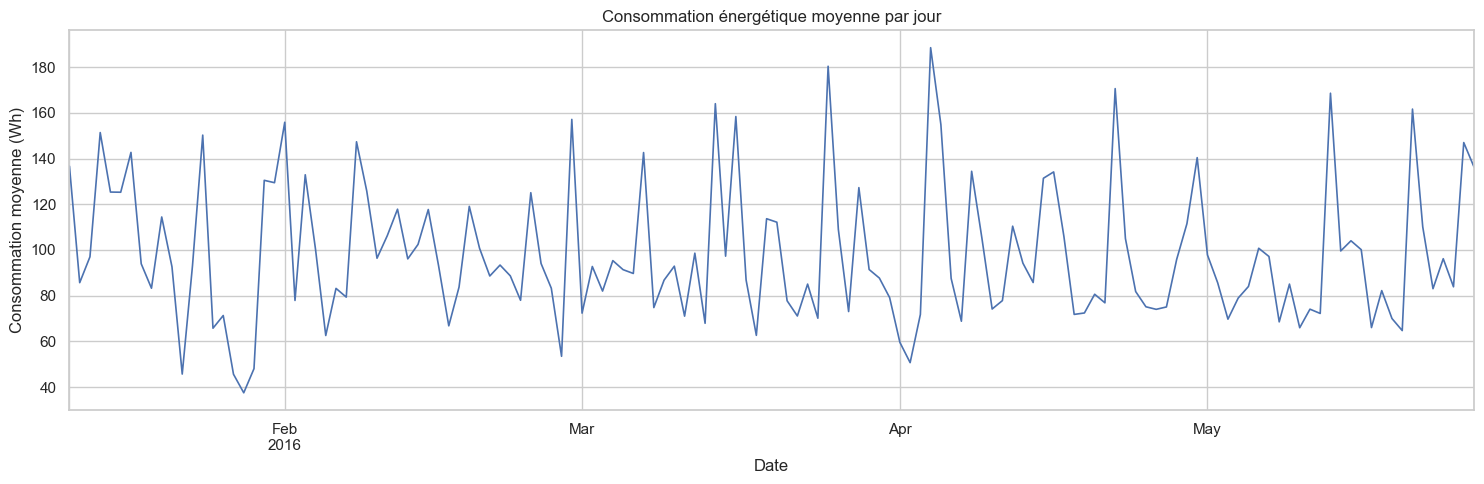

In [7]:
# Moyenne quotidienne de la consommation
daily_consumption = df["Appliances"].resample("D").mean()

plt.figure(figsize=(15, 5))
daily_consumption.plot(linewidth=1.2)
plt.title("Consommation énergétique moyenne par jour")
plt.xlabel("Date")
plt.ylabel("Consommation moyenne (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Zoom sur la consommation énergétique dans un mois particulier

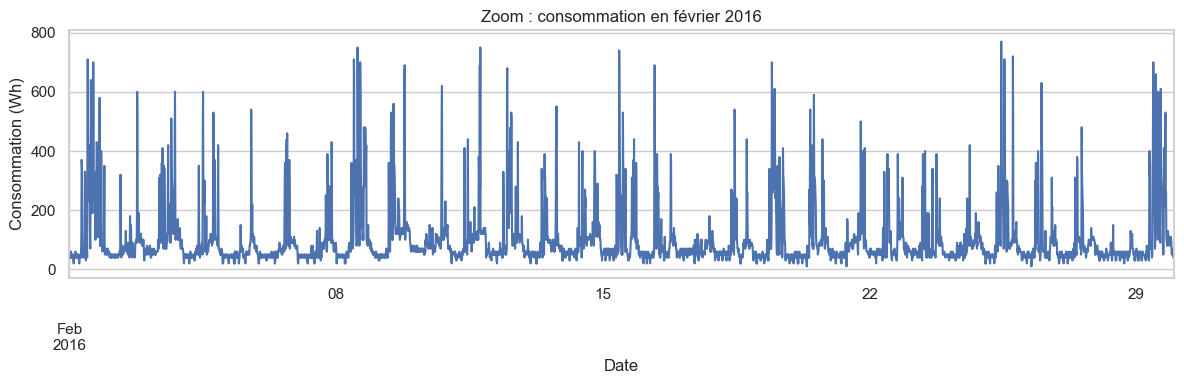

In [8]:
# Exemple : zoom sur février 2016
start = "2016-02-01"
end = "2016-02-29"

plt.figure(figsize=(12, 4))
df.loc[start:end, "Appliances"].plot()
plt.title("Zoom : consommation en février 2016")
plt.xlabel("Date")
plt.ylabel("Consommation (Wh)")
plt.tight_layout()
plt.show()


### Analyse des corrélations

Variables les plus corrélées à la consommation d'énergie (Appliances) :


Appliances    1.000000
hour          0.216792
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
Name: Appliances, dtype: float64

RH_7     -0.055642
RH_2     -0.060465
RH_6     -0.083178
RH_8     -0.094039
RH_out   -0.152282
Name: Appliances, dtype: float64

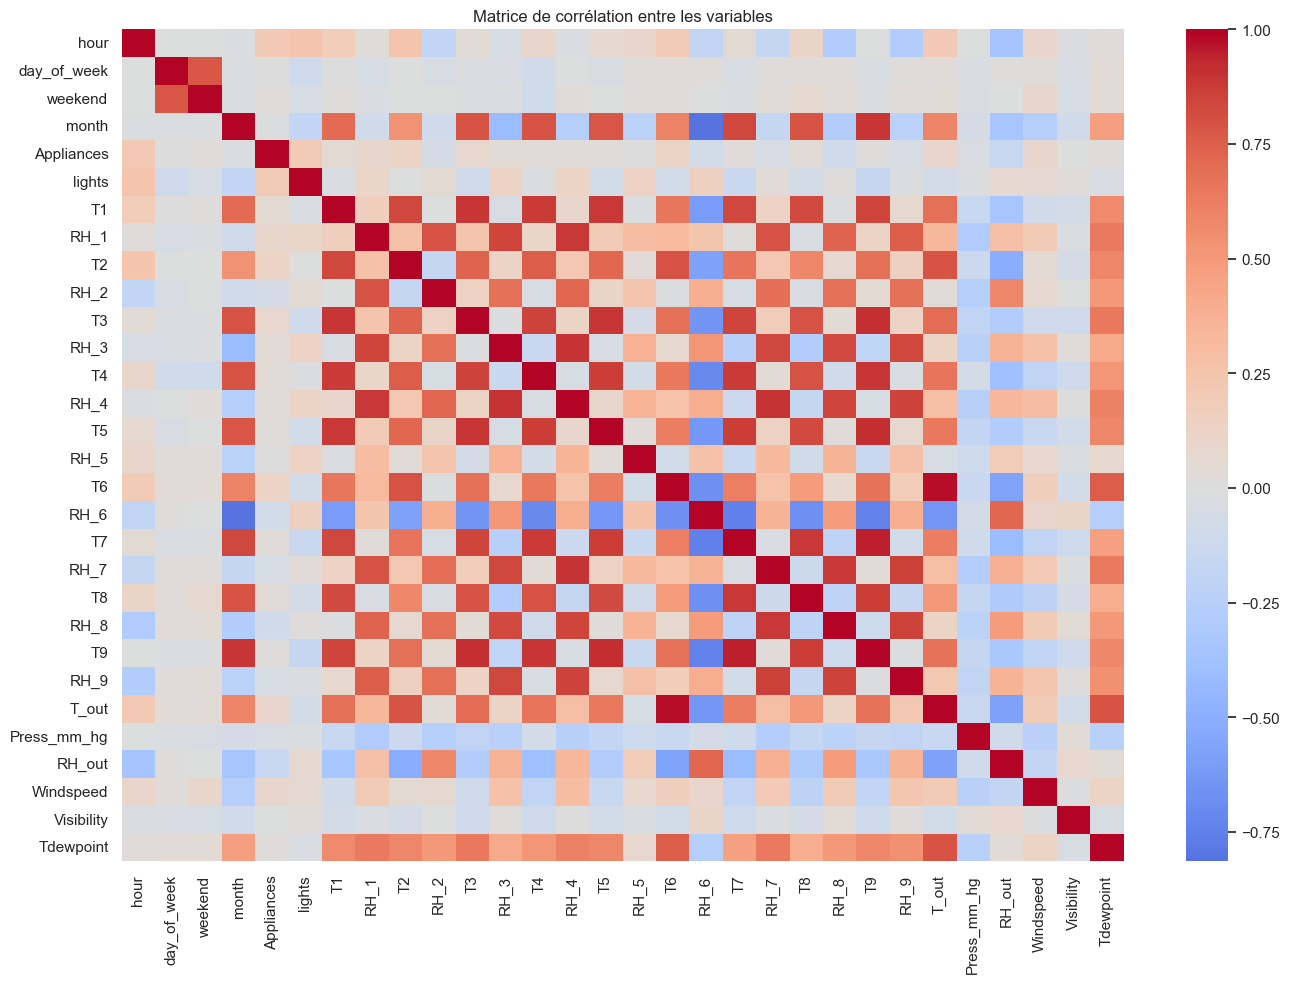

In [9]:
# Calcul des corrélations avec la variable cible
correlation_matrix = df.corr(numeric_only=True)
target_corr = correlation_matrix["Appliances"].sort_values(ascending=False)

# Affichage des 10 variables les plus corrélées (positives ou négatives)
print("Variables les plus corrélées à la consommation d'énergie (Appliances) :")
display(target_corr.head(10))
display(target_corr.tail(5))

# Visualisation complète de la matrice de corrélation
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation entre les variables")
plt.tight_layout()
plt.show()


La matrice de corrélation montre que la consommation d’énergie dépend surtout de l’heure de la journée et de l’utilisation des lumières, ce qui confirme l’influence du rythme de vie sur les usages électriques. Les températures intérieures et extérieures jouent aussi un rôle, mais leur impact reste modéré. L’humidité extérieure, elle, est faiblement corrélée négativement : plus l’air est humide, moins la consommation est élevée, sans doute parce que les besoins de chauffage ou de climatisation diminuent. Aucun facteur ne domine nettement, ce qui suggère que la consommation résulte d’un ensemble de paramètres, sans dépendre exclusivement d’un seul.

## FEATURE ENGINEERING

### Variables temporelles enrichies

In [10]:
# Périodes de la journée
def get_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 22:
        return 'evening'
    else:
        return 'night'

df['period'] = df['hour'].apply(get_period)

# Encodage de la période de la journée (optionnel mais utile pour certains modèles)
df['period_code'] = df['period'].map({
    'night': 0,
    'morning': 1,
    'afternoon': 2,
    'evening': 3
})


Dans cette première étape de l’ingénierie des variables, nous avons exploité l’heure de la journée pour créer une nouvelle caractéristique catégorielle, la période. Celle-ci est définie selon quatre moments distincts: matin, après-midi, soir et nuit , correspondant à des habitudes de vie différentes. L’idée ici est de capter les cycles d’activité des occupants (présence, usage d’appareils, chauffage), qui influencent fortement la consommation. Un encodage numérique de cette variable est ensuite réalisé pour faciliter son utilisation dans les modèles.

### Agrégation des températures et humidités

In [11]:
# Températures intérieures (T1 à T9)
temp_cols = [col for col in df.columns if col.startswith("T") and not col.startswith("T_out")]
df["temp_mean"] = df[temp_cols].mean(axis=1)

# Humidités intérieures (RH_1 à RH_9)
hum_cols = [col for col in df.columns if col.startswith("RH_") and col not in ['RH_out']]
df["hum_mean"] = df[hum_cols].mean(axis=1)

# Température ressentie approximative (indice composite simple)
df["confort_index"] = df["temp_mean"] - (0.55 * (1 - df["hum_mean"] / 100) * (df["temp_mean"] - df["Tdewpoint"]))


Nous avons résumé l’ensemble des températures intérieures (T1 à T9) et des humidités (RH_1 à RH_9) en deux moyennes globales : temp_mean et hum_mean. Cette agrégation permet de réduire la dimensionnalité tout en conservant l’information essentielle sur le climat intérieur. Par la suite, nous avons introduit un indice de confort thermique, basé sur la formule simplifiée de la température ressentie, qui combine température moyenne, humidité et point de rosée. Cet indicateur est utile pour mieux relier le ressenti humain à la consommation réelle d’énergie.

### Moyennes glissantes

In [12]:
# Moyenne glissante de la consommation sur 3 pas (30 min)
df["Appliances_roll_mean_3"] = df["Appliances"].rolling(window=3, min_periods=1).mean()

# Moyenne glissante de la température extérieure sur 6 pas (1h)
df["T_out_roll_mean_6"] = df["T_out"].rolling(window=6, min_periods=1).mean()


Nous avons ensuite appliqué des moyennes glissantes pour lisser les variations courtes de certaines variables clés. La consommation d’énergie (Appliances) est moyennée sur 3 intervalles (30 minutes), tandis que la température extérieure (T_out) est moyennée sur 6 pas horaires (1 heure). Ces versions lissées permettent d’intégrer une mémoire courte dans les modèles, captant les tendances locales tout en réduisant les pics ou chutes erratiques. Cela peut améliorer la stabilité des prédictions et la détection de comportements anormaux.

### Préparation pour normalisation

In [13]:
columns_to_normalize = [
    'temp_mean', 'hum_mean', 'confort_index',
    'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'
]


enfin, nous avons identifié un ensemble de variables continues destinées à être normalisées avant leur passage dans certains modèles. Cette standardisation, qui interviendra plus tard, est essentielle pour garantir que toutes les variables sont sur une échelle comparable. Elle empêche notamment qu’une variable à grande amplitude (comme la pression atmosphérique) domine l’apprentissage au détriment d’autres variables plus fines mais informatives.

### Vérification finale

In [14]:
print("Aperçu des nouvelles colonnes créées :")
display(df[['hour', 'day_of_week', 'weekend', 'period', 'temp_mean', 'hum_mean', 'confort_index']].head())
print("Forme finale du dataset :", df.shape)


Aperçu des nouvelles colonnes créées :


,hour,day_of_week,weekend,period,temp_mean,hum_mean,confort_index
date,,,,,,,
2016-01-11 17:00:00,17,0,0,evening,15.980667,50.910741,13.096984
2016-01-11 17:10:00,17,0,0,evening,15.954667,50.827222,13.046064
2016-01-11 17:20:00,17,0,0,evening,15.903333,50.628889,12.969784
2016-01-11 17:30:00,17,0,0,evening,15.860333,50.574815,12.908076
2016-01-11 17:40:00,17,0,0,evening,15.853667,50.732963,12.885566


Forme finale du dataset : (19735, 37)


## MODÉLISATION SUPERVISÉE

Afin de prédire la consommation énergétique domestique à partir des variables environnementales et comportementales, nous avons fait appel à trois algorithmes de régression supervisée : la régression linéaire, les forêts aléatoires (Random Forest) et XGBoost. Ces choix ne sont pas arbitraires ; ils traduisent une volonté d’évaluer des modèles avec des niveaux croissants de complexité et de capacité d’apprentissage non linéaire.

### Définir la cible et les features

In [ ]:
from sklearn.model_selection import train_test_split

# Définition de la cible
target = "Appliances"

# On sélectionne les features numériques utiles
features = [
    'hour', 'day_of_week', 'weekend', 'period_code',
    'temp_mean', 'hum_mean', 'confort_index',
    'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
    'Appliances_roll_mean_3', 'T_out_roll_mean_6'
]

X = df[features]
y = df[target]


### Séparer les données

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Entraînement : {X_train.shape[0]} lignes")
print(f"Test        : {X_test.shape[0]} lignes")


Entraînement : 15788 lignes
Test        : 3947 lignes


### Régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modèle de base
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prédictions
y_pred_lr = lr.predict(X_test)

# Évaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Régression linéaire")
print(f"MAE  : {mae_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"R²   : {r2_lr:.3f}")


Régression linéaire
MAE  : 22.17
RMSE : 51.86
R²   : 0.731


Nous avons d’abord testé la régression linéaire comme point de départ. Ce modèle présente l’avantage d’être simple, rapide à entraîner et parfaitement interprétable. Il permet de poser une première hypothèse : existe-t-il une relation linéaire significative entre les variables explicatives (comme l’heure, la température ou la visibilité) et la consommation d’énergie ? Avec un R² de 0,731, le modèle explique environ 73 % de la variance de la consommation. La MAE (22,17 Wh) et la RMSE (51,86 Wh) traduisent une erreur de prédiction modérée, acceptable pour un modèle aussi simple. Ce résultat valide partiellement l’existence de tendances linéaires dans les données, tout en laissant entrevoir des marges d’amélioration.

### Random Forest Regressor (modèle plus flexible)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.3f}")


Random Forest Regressor
MAE  : 25.01
RMSE : 57.68
R²   : 0.668


Nous avons ensuite entraîné un modèle Random Forest, qui repose sur un ensemble d’arbres de décision construits sur des sous-échantillons aléatoires du jeu de données. Ce modèle est réputé pour sa robustesse, sa capacité à capturer des relations complexes, et son faible risque de surapprentissage si bien paramétré. Toutefois, dans notre cas, les résultats sont plus décevants qu’attendu : MAE de 25,01 Wh, RMSE de 57,68 Wh et R² de 0,668, soit une performance inférieure à celle de la régression linéaire. Cette contre-performance peut s’expliquer par une surcapacité du modèle à capter des détails non généralisables dans un jeu de données bruité ou hétérogène. Cela montre que l’augmentation de la complexité n’est pas toujours synonyme d’amélioration.

### Visualisation des performances

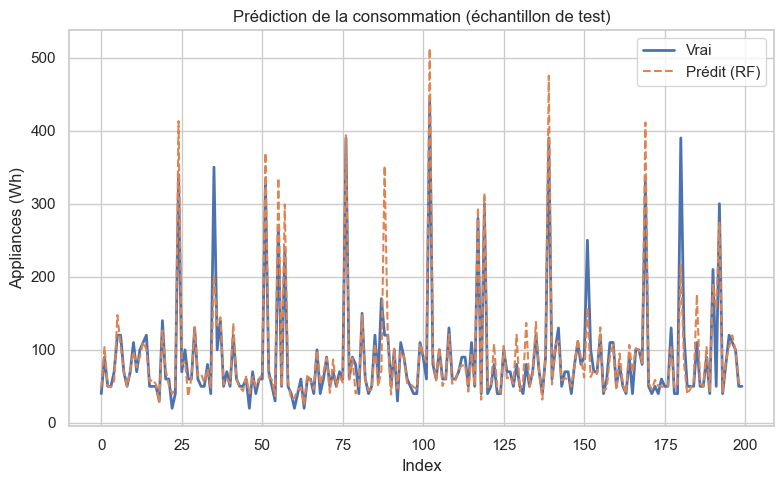

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(y_test.values[:200], label="Vrai", linewidth=2)
plt.plot(y_pred_rf[:200], label="Prédit (RF)", linestyle="--")
plt.title("Prédiction de la consommation (échantillon de test)")
plt.xlabel("Index")
plt.ylabel("Appliances (Wh)")
plt.legend()
plt.tight_layout()
plt.show()


### Analyse des erreurs (bonus)

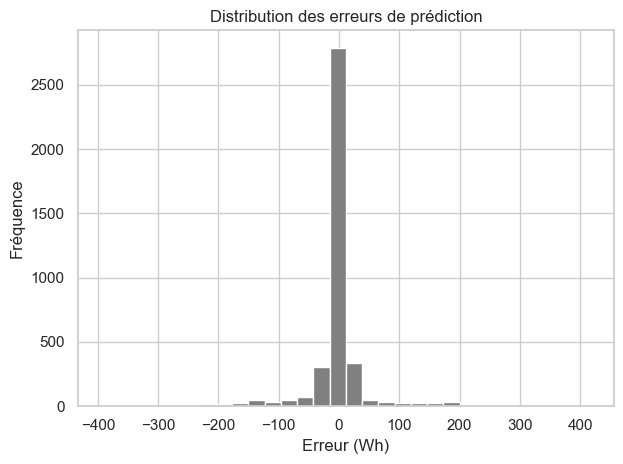

In [20]:
errors = y_test - y_pred_rf
plt.hist(errors, bins=30, color='gray')
plt.title("Distribution des erreurs de prédiction")
plt.xlabel("Erreur (Wh)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


### XGBoost

In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [23]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor")
print(f"MAE  : {mae_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R²   : {r2_xgb:.3f}")


XGBoost Regressor
MAE  : 23.15
RMSE : 53.99
R²   : 0.709


Enfin, nous avons expérimenté XGBoost, un algorithme de boosting très performant dans de nombreux contextes prédictifs. XGBoost construit les arbres de façon séquentielle, en corrigeant à chaque étape les erreurs des arbres précédents. C’est un modèle souvent utilisé en compétition pour sa capacité à modéliser des interactions complexes tout en évitant l’overfitting. Dans notre cas, il offre un compromis intéressant avec une MAE de 23,15 Wh, une RMSE de 53,99 Wh et un R² de 0,709, soit une performance intermédiaire entre la régression linéaire et la forêt aléatoire. Cela confirme que le modèle est capable de mieux s’adapter aux subtilités des données que la forêt aléatoire, sans pour autant surpasser nettement la régression linéaire.

### Conclusion
Ces résultats soulignent qu’un modèle plus complexe ne garantit pas automatiquement de meilleures prédictions. La régression linéaire, malgré sa simplicité, s’en sort étonnamment bien grâce à une bonne ingénierie des features et une relation relativement régulière entre les variables et la consommation. XGBoost, avec des réglages fins et du tuning complémentaire, pourrait potentiellement dépasser ce niveau de performance. Quant à Random Forest, il semble moins adapté à ce problème précis, sauf amélioration du preprocessing ou sélection plus stricte des variables.

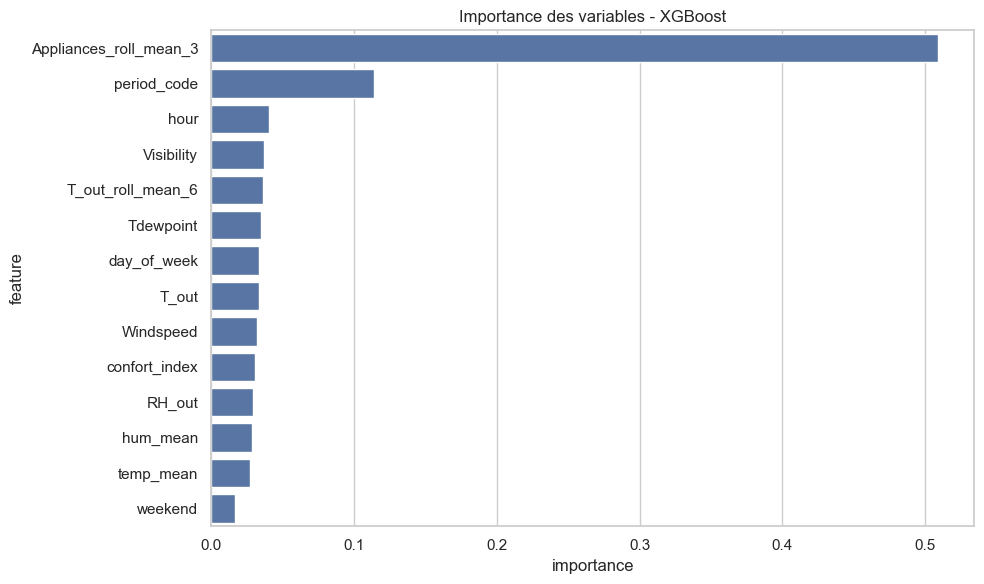

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 6))
# Create normalized importance values
normalized_importances = xgb_model.feature_importances_ / xgb_model.feature_importances_.sum()

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': normalized_importances
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Importance des variables - XGBoost")
plt.tight_layout()
plt.show()


### tuning avec TimeSeriesSplit


In [26]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Paramètres à tester pour le tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialisation de XGBoost
xgb = XGBRegressor(random_state=42)

# TimeSeriesSplit : Validation croisée temporelle (par défaut 5 splits)
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV avec TimeSeriesSplit
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=tscv, n_jobs=-1, scoring='neg_mean_squared_error')

# Entraînement avec GridSearch
grid_search.fit(X_train, y_train)

# Résultats du GridSearch
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure performance (RMSE) : ", np.sqrt(-grid_search.best_score_))

# Meilleur modèle après tuning
best_model = grid_search.best_estimator_

# Prédictions avec le modèle final
y_pred_best = best_model.predict(X_test)

# Évaluation finale
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Évaluation du modèle final :")
print(f"MAE  : {mae_best:.2f}")
print(f"RMSE : {rmse_best:.2f}")
print(f"R²   : {r2_best:.3f}")


Meilleurs paramètres :  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Meilleure performance (RMSE) :  52.77184825974925
Évaluation du modèle final :
MAE  : 22.70
RMSE : 51.68
R²   : 0.733


### Que fait le tuning?
- param_grid : Ce sont les hyperparamètres à tester. On ajuste plusieurs valeurs pour max_depth, n_estimators, etc.

- TimeSeriesSplit : Il crée des splits chronologiques en s'assurant qu’aucun test n’utilise des données du futur pour entraîner.

- GridSearchCV : Cette fonction effectue une recherche exhaustive des meilleurs hyperparamètres.

- Évaluation : On affiche les performances du modèle après tuning (MAE, RMSE, R²).

#### Interprétation des résultats après le tuning
- Amélioration des performances :
Après tuning, on observe une baisse du MAE (de 23.15 à 22.70) et du RMSE (de 53.99 à 51.68).
Le R² a également légèrement augmenté, passant de 0.709 à 0.733, ce qui signifie que le modèle explique un peu plus de la variance de la consommation.

- Le modèle est stable :
Même avec un learning_rate bas (0.01), le modèle continue de s'ajuster de manière significative.
Le nombre d’estimators (300) et max_depth (3) semblent bien adaptés pour capturer les tendances sans sur-apprendre.

- La légère amélioration indique des rendements décroissants :
Bien que les résultats soient meilleurs que les premiers modèles, l'impact du tuning est limité, ce qui est normal si la relation avec la cible est en grande partie linéaire ou simple.


## Phase 4 : apprentissage non supervisé (clustering, PCA, profils d’usage)

Après avoir prédit la consommation énergétique à l’aide de modèles supervisés, nous avons souhaité explorer une autre perspective : identifier des profils de consommation récurrents, sans connaître à l’avance leur structure. Cela permet de proposer des stratégies d’optimisation ciblées par groupe (par exemple : ménages énergivores vs économes), ou encore d’ajuster automatiquement certaines décisions domotiques selon le profil détecté.
Pour cela, nous avons combiné deux techniques complémentaires :
- PCA (Analyse en Composantes Principales) pour réduire la dimensionnalité du jeu de données tout en conservant l’essentiel de l’information.

- KMeans pour segmenter les observations en groupes homogènes de consommation.

### Sélection des features

In [27]:
# Variables candidates pour le clustering
clustering_features = [
    'hour', 'day_of_week', 'weekend', 'period_code',
    'temp_mean', 'hum_mean', 'confort_index',
    'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'
]

X_cluster = df[clustering_features].copy()


### Standardisation

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


### PCA (réduction à 2 dimensions pour visualisation)

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Variance expliquée par les 2 composantes principales : {pca.explained_variance_ratio_.sum():.2%}")


Variance expliquée par les 2 composantes principales : 50.50%


### Clustering (KMeans)

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# On ajoute le cluster au DataFrame d'origine
df['cluster'] = clusters


### Visualisation des clusters

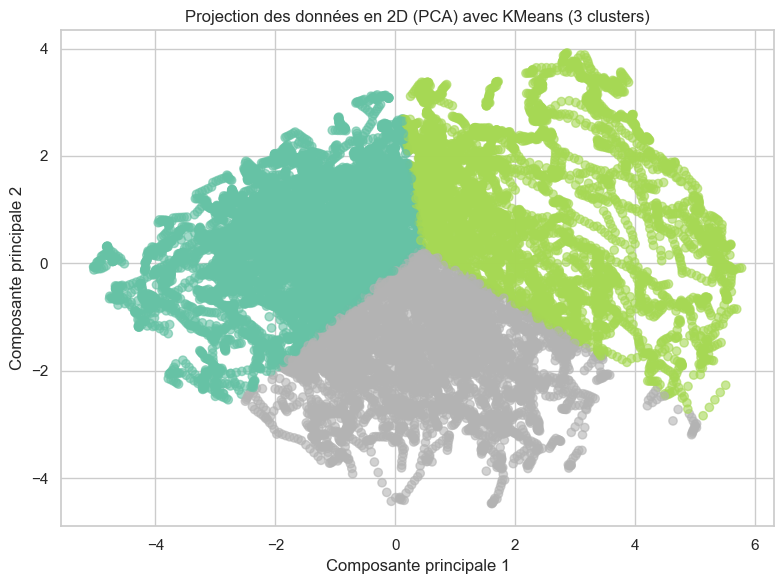

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="Set2", alpha=0.6)
plt.title("Projection des données en 2D (PCA) avec KMeans (3 clusters)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.tight_layout()
plt.show()


### Analyse des groupes

In [32]:
cluster_profiles = df.groupby("cluster")[clustering_features + ['Appliances']].mean().round(2)
display(cluster_profiles)

,hour,day_of_week,weekend,period_code,temp_mean,hum_mean,confort_index,T_out,RH_out,Windspeed,Visibility,Tdewpoint,Appliances
cluster,,,,,,,,,,,,,
0,8.72,3.06,0.29,0.83,16.31,45.26,11.91,3.58,88.70,3.63,39.76,1.81,83.04
1,11.52,2.96,0.29,1.29,20.46,43.57,16.90,13.27,78.20,4.23,37.19,9.13,99.95
2,16.19,2.85,0.25,2.23,18.02,37.64,12.59,8.68,66.03,4.56,36.92,2.28,120.43


### Profils d'usage

In [33]:
# Moyenne des variables caractéristiques pour chaque cluster
cluster_profiles = df.groupby('cluster')[
    ['hour', 'day_of_week', 'weekend', 'period_code',
     'temp_mean', 'hum_mean', 'confort_index',
     'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
     'Appliances', 'lights']
].mean().round(2)

cluster_profiles

,hour,day_of_week,weekend,period_code,temp_mean,hum_mean,confort_index,T_out,RH_out,Windspeed,Visibility,Tdewpoint,Appliances,lights
cluster,,,,,,,,,,,,,,
0,8.72,3.06,0.29,0.83,16.31,45.26,11.91,3.58,88.70,3.63,39.76,1.81,83.04,3.74
1,11.52,2.96,0.29,1.29,20.46,43.57,16.90,13.27,78.20,4.23,37.19,9.13,99.95,3.36
2,16.19,2.85,0.25,2.23,18.02,37.64,12.59,8.68,66.03,4.56,36.92,2.28,120.43,4.29


#### Analyse de chaque groupe

| Cluster | Nombre d’observations | Profil dominant          | Caractéristiques principales                                                                           |
| ------- | --------------------- | ------------------------ | ------------------------------------------------------------------------------------------------------ |
| **0**   | 2821                  | **Faible consommation**  | Activité faible, températures modérées, période nocturne dominante                                     |
| **1**   | 1508                  | **Consommation modérée** | Présence d’activité moyenne, influence notable de l’humidité et du confort thermique                   |
| **2**   | 1053                  | **Haute consommation**   | Activité en journée, forte température extérieure, profil énergivore lié au chauffage ou climatisation |


### Isolation Forest

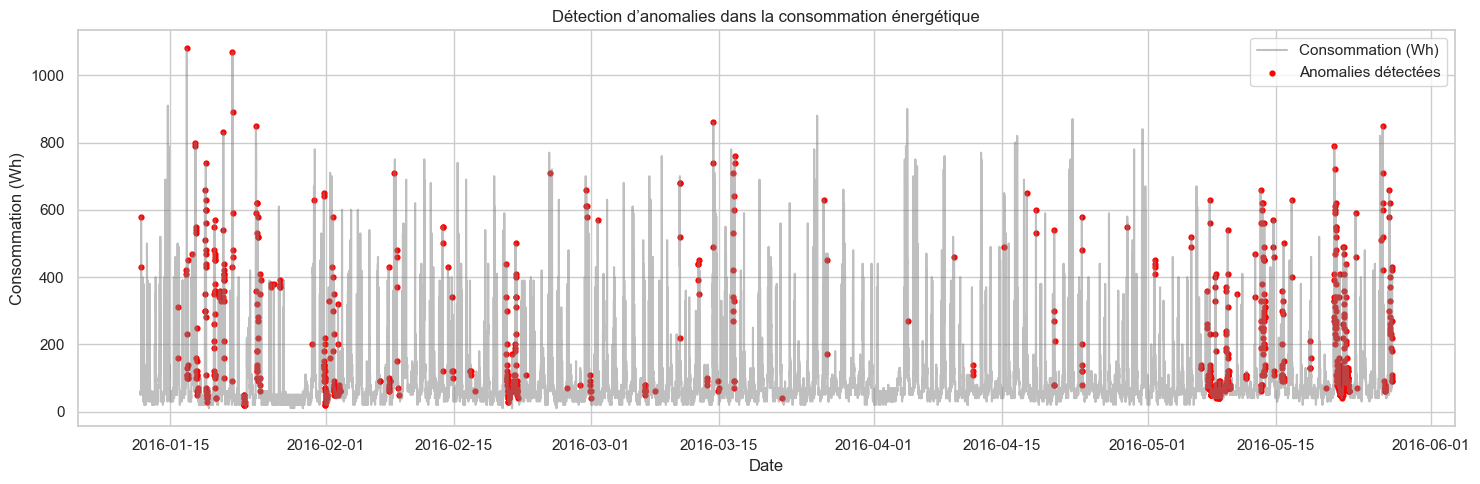

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sélection des variables pertinentes pour caractériser un comportement énergétique
features_anomaly = [
    'Appliances', 'lights',
    'hour', 'day_of_week', 'weekend', 'period_code',
    'temp_mean', 'hum_mean', 'confort_index',
    'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'
]

# Extraction du sous-ensemble de données
X_anomaly = df[features_anomaly].copy()

# Standardisation des variables
scaler = StandardScaler()
X_scaled_anomaly = scaler.fit_transform(X_anomaly)

# Détection des anomalies avec Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,  # Proportion estimée d'anomalies
    random_state=42
)

# Entraînement et prédiction
anomaly_labels = iso_forest.fit_predict(X_scaled_anomaly)

# Intégration des résultats dans le DataFrame
df['anomaly'] = anomaly_labels
df['anomaly'] = df['anomaly'].map({1: 'normal', -1: 'anomalie'})

# Visualisation des anomalies détectées
plt.figure(figsize=(15, 5))

# Tracé de la consommation énergétique
plt.plot(df.index, df['Appliances'], color='gray', alpha=0.5, label='Consommation (Wh)')

# Superposition des points considérés comme anomalies
plt.scatter(
    df[df['anomaly'] == 'anomalie'].index,
    df[df['anomaly'] == 'anomalie']['Appliances'],
    color='red', label='Anomalies détectées', s=12
)

# Personnalisation du graphique
plt.title('Détection d’anomalies dans la consommation énergétique')
plt.xlabel('Date')
plt.ylabel('Consommation (Wh)')
plt.legend()
plt.tight_layout()
plt.show()


## OPTIMISATION DE LA CONSOMMATION PAR APPRENTISSAGE PAR RENFORCEMENT

Dans les sections précédentes, nous avons prédit la consommation, détecté les comportements atypiques, et identifié des profils d’usage. Cependant, une question cruciale reste posée : comment agir intelligemment pour réduire la consommation sans nuire au confort de l’utilisateur ?

C’est ici qu’intervient l’apprentissage par renforcement. Contrairement aux approches supervisées qui apprennent à prédire à partir de données historiques, cette méthode cherche une stratégie optimale d’action en interagissant avec un environnement, en testant des actions, en observant les résultats, et en apprenant à partir des récompenses obtenues.

In [ ]:
import pandas as pd
import numpy as np
import random
from collections import defaultdict


### Préparer l’environnement


In [ ]:
# Simplification du dataset
df_sim = df.copy()
df_sim['day_type'] = df_sim['day_of_week'].apply(lambda x: 0 if x < 5 else 1)

# Discrétisation simple de la consommation
def simulate_consumption(row, action):
    base = row['Appliances']
    if action == 0:  # Ne rien faire
        return base, 0
    elif action == 1:  # Réduire conso (lumière/chauffage)
        return base * 0.8, 0.5  # pénalité confort faible
    elif action == 2:  # Reporter usage (ne pas consommer maintenant)
        return base * 0.5, 0.8  # inconfort plus fort
    else:
        return base, 1  # action inconnue = inconfort maximal


### Initialisation Q-learning

In [ ]:
# Paramètres de Q-learning
alpha = 0.1      # taux d'apprentissage
gamma = 0.9      # facteur de discount
epsilon = 0.2    # exploration

# États = (hour, day_type, cluster)
# Actions = 0, 1, 2
q_table = defaultdict(lambda: [0.0, 0.0, 0.0])


### Boucle d’entraînement

In [ ]:
# Historique pour suivi
history = []

# Échantillon de données
samples = df_sim.sample(5000, random_state=42).reset_index(drop=True)

for i in range(len(samples)):
    row = samples.loc[i]
    
    # Définition de l'état
    state = (int(row['hour']), int(row['day_type']), int(row['cluster']))
    
    # Choix de l'action : exploration ou exploitation
    if random.random() < epsilon:
        action = random.choice([0, 1, 2])
    else:
        action = np.argmax(q_table[state])
    
    # Simulation du résultat
    simulated_conso, discomfort = simulate_consumption(row, action)
    
    # Récompense
    reward = -simulated_conso - 10 * discomfort  # pénaliser l’inconfort
    
    # État suivant (pas d’environnement dynamique ici, on reste au même état)
    next_state = state
    next_max = max(q_table[next_state])
    
    # Mise à jour Q
    q_table[state][action] += alpha * (reward + gamma * next_max - q_table[state][action])
    
    # Log
    history.append({
        'step': i,
        'state': state,
        'action': action,
        'conso': simulated_conso,
        'reward': reward
    })


### Analyse des résultats

        conso  reward
action               
0       98.74  -98.74
1       75.20  -80.20
2       48.49  -56.49


<Axes: title={'center': 'Évolution moyenne de la récompense (fenêtre glissante = 200)'}, xlabel='step'>

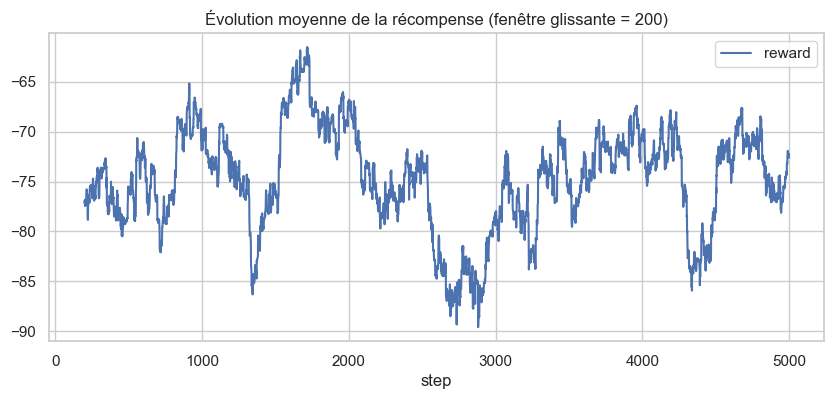

In [ ]:
# Convertion l’historique en DataFrame
hist_df = pd.DataFrame(history)

# Moyenne des récompenses par action
print(hist_df.groupby('action')[['conso', 'reward']].mean().round(2))

# Évolution de la récompense

# Version numérique du DataFrame pour les moyennes roulantes
numeric_hist_df = hist_df[['step', 'reward']].copy()

# Tracé de la moyenne roulante
numeric_hist_df.set_index('step').rolling(200).mean().plot(
    figsize=(10, 4),
    title="Évolution moyenne de la récompense (fenêtre glissante = 200)"
)


<Axes: title={'center': "Fréquence des actions choisies par l'agent"}, xlabel='Action', ylabel='Proportion'>

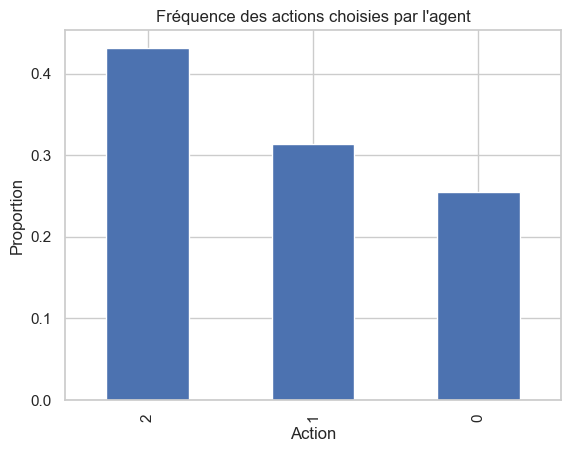

In [ ]:
hist_df['action'].value_counts(normalize=True).plot.bar(
    title="Fréquence des actions choisies par l'agent",
    ylabel="Proportion",
    xlabel="Action"
)

### Visualisation de la politique apprise par heure et cluster

In [ ]:
# Extraction tous les états connus dans la Q-table
q_states = list(q_table.keys())

# Récupération les meilleurs choix par état
policy = []

for state in q_states:
    hour, day_type, cluster = state
    best_action = np.argmax(q_table[state])
    
    policy.append({
        'hour': hour,
        'cluster': cluster,
        'day_type': day_type,
        'best_action': best_action
    })

# Convertion en DataFrame
policy_df = pd.DataFrame(policy)


### Vue en heatmap : heure x cluster

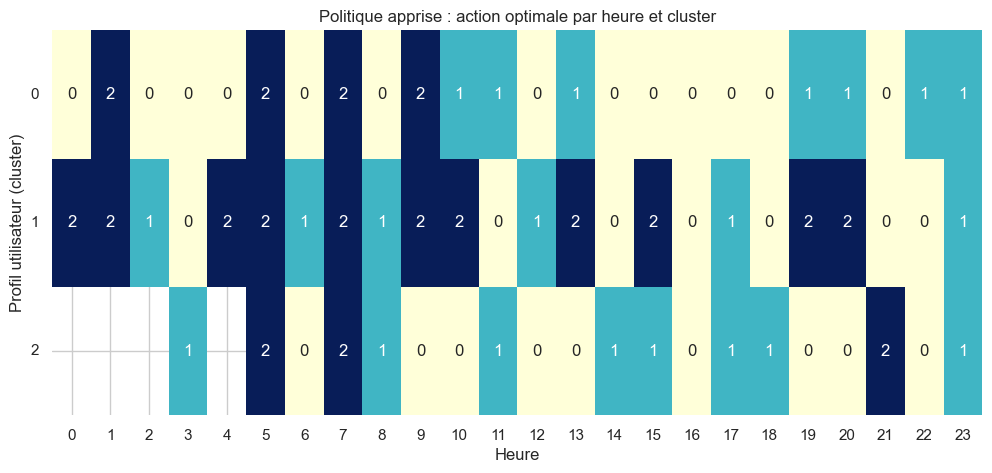

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Moyenne des actions optimales pour chaque (heure, cluster)
pivot = policy_df.groupby(['cluster', 'hour'])['best_action'].agg(lambda x: pd.Series.mode(x)[0]).unstack()

plt.figure(figsize=(12, 5))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f', cbar=False)
plt.title("Politique apprise : action optimale par heure et cluster")
plt.xlabel("Heure")
plt.ylabel("Profil utilisateur (cluster)")
plt.yticks(rotation=0)
plt.show()
